# Predicting Heart Disease using Machine Learning:

 **STEPS:**
   1. Problem Definition
   2. Data Dictionary
   3. Evaluation
   4. Features
   5. Modelling
   6. Experimentation

## 1. Problem Definiton:

    > Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data Dictionary:

    > https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## 3. Evaluation:
    > If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features:
    
    Only 14 attributes used:
    1. age
    
    2. sex (male = 1; female = 0)
    
    3. cp: chest pain type
           -- Value 1: typical angina
           -- Value 2: atypical angina
           -- Value 3: non-anginal pain
           -- Value 4: asymptomatic
           
    4. trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
    
    5. chol: serum cholestoral in mg/dl 
    
    6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    
    7. restecg: resting electrocardiographic results
               -- Value 0: normal
               -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
               -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
                
    8. thalach: maximum heart rate achieved 
    
    9. exang: exercise induced angina (1 = yes; 0 = no) 
    
    10. oldpeak: ST depression induced by exercise relative to rest 
    
    11. slope: the slope of the peak exercise ST segment
               -- Value 1: upsloping
               -- Value 2: flat
               -- Value 3: downsloping
               
    12. ca: number of major vessels (0-3) col1ored by flourosopy 
    
    13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
    
    14. target: have disease or not (Yes=1; No=0)(=predicted attribute)


# 5. Modelling

In [1]:
# EDA and Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Zero to Mastery Project - Heart Disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

## 5.1. Exploratory Data Analysis - EDA
**The goal is to find more about the data and become subject matter expert on data**

1. What questions are we trying to solve?
2. What kind of data we have and how dp we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the Outliers and why should we care about them?
5. How can we add, change or remove features to get more out of the data?

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

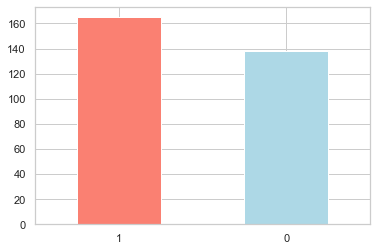

In [8]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 
                                                    'lightblue'])
plt.xticks(rotation=0);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

* Male = 1, Female = 0
* Yes = 1, No = 0

In [12]:
# Missing Values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
# Compare target column with sex column

pd.crosstab(df.target, df.sex, margins=True, margins_name='Total')

sex,0,1,Total
target,,,
0,24,114,138
1,72,93,165
Total,96,207,303


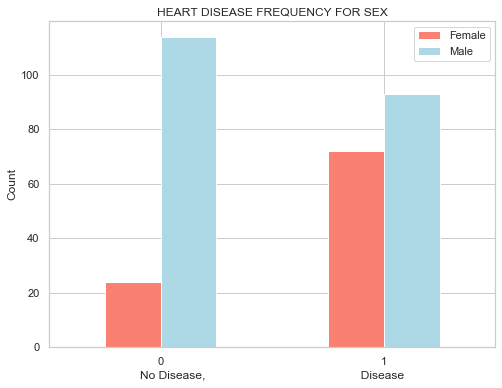

In [14]:
# Create a plot of crosstab

pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(8,6),
                                   color=['salmon', 'lightblue'])
plt.legend(['Female', 'Male'])
plt.title('HEART DISEASE FREQUENCY FOR SEX')
plt.xlabel('No Disease,                                              Disease')
plt.ylabel('Count')
plt.xticks(rotation=0);

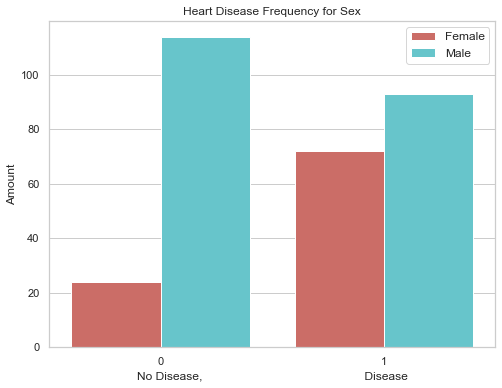

In [15]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x='target', hue='sex', data=df, palette='hls')

ax.set(title = 'Heart Disease Frequency for Sex',
      xlabel = 'No Disease,                                                Disease',
      ylabel = 'Amount')

ax.legend(['Female', 'Male'], fontsize='medium');

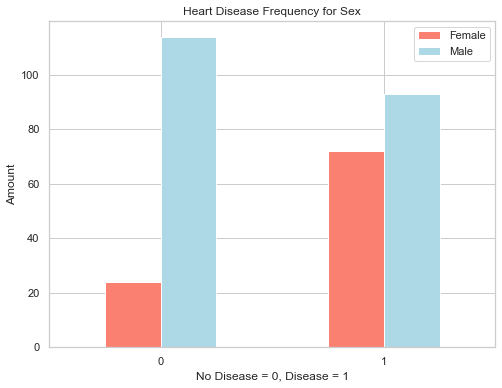

In [16]:
# Create a plot of crosstab

pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize = (8,6), 
                                    color=['salmon', 'lightblue'])
     
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('No Disease = 0, Disease = 1')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

 Try to combine couple independent variable and compare them to target variable

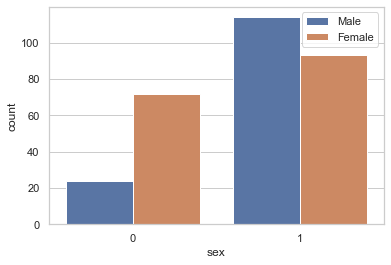

In [17]:
sns.countplot(x='sex', hue='target',data=df)
plt.legend(['Male', 'Female'])

### Age vs Max Heart Rate(thalach) for Heart Disease

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


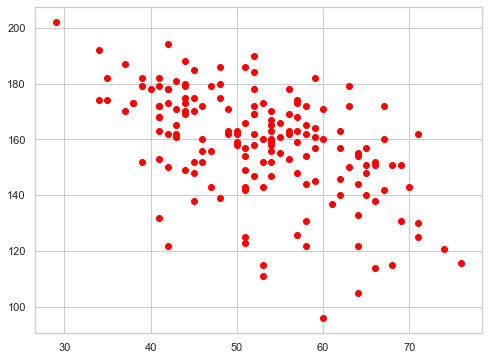

In [19]:
plt.figure(figsize=(8,6))

# patients with heart disease
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1],
           c='red');

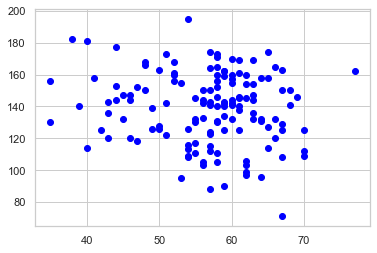

In [20]:
# patients without heart disease
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0],
           c='blue');

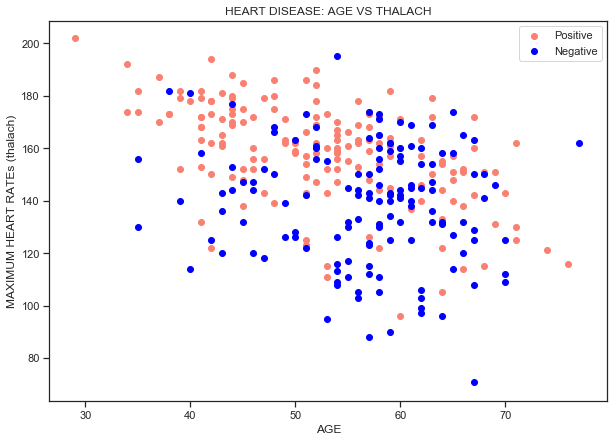

In [21]:
plt.figure(figsize=(10,7))
sns.set_style('ticks')

# patients with heart disease
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1],
           c='salmon')

# patients without heart disease
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0],
           c='blue')

plt.legend(['Positive', 'Negative'])
plt.xlabel('AGE')
plt.ylabel('MAXIMUM HEART RATEs (thalach)')
plt.title('HEART DISEASE: AGE VS THALACH');

Age distribution

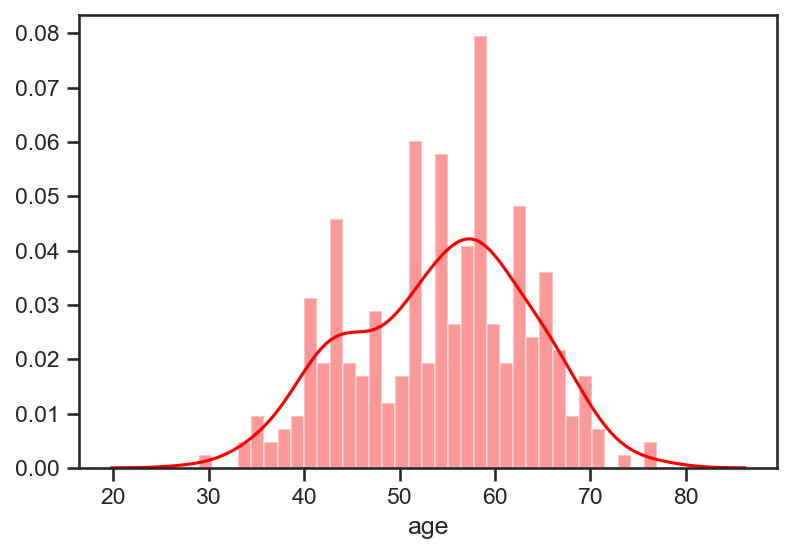

In [22]:
plt.figure(dpi=150)
sns.distplot(df.age, color='red', bins=35);

### Heart Disease Frequency  per Chest pain Type:

cp: chest pain type
  - Value 0: typical angina: chest pain related decrease blood supply to heart
  - Value 1: atypical angina: chest pain not related to heart
  - Value 2: non-anginal pain: typically espophageal spasms (non heart related)
  - Value 3: asymptomatic: chest pain signs of disease

In [23]:
df.age[df.target == 1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

In [24]:
pd.crosstab(df.cp, df.target, margins=True, margins_name='Total')

target,0,1,Total
cp,,,
0,104,39,143
1,9,41,50
2,18,69,87
3,7,16,23
Total,138,165,303


<Figure size 1800x1200 with 0 Axes>

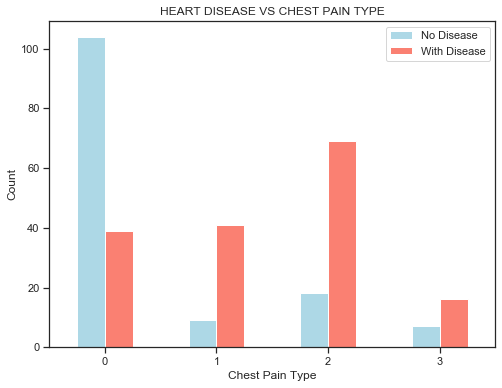

In [25]:
plt.figure(dpi=300)
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(8,6),
                                  color=['lightblue', 'salmon'])

plt.title('HEART DISEASE VS CHEST PAIN TYPE')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(['No Disease', 'With Disease'])
plt.xticks(rotation=0);

### Build a Correlation Matrix


In [26]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Figure size 432x288 with 0 Axes>

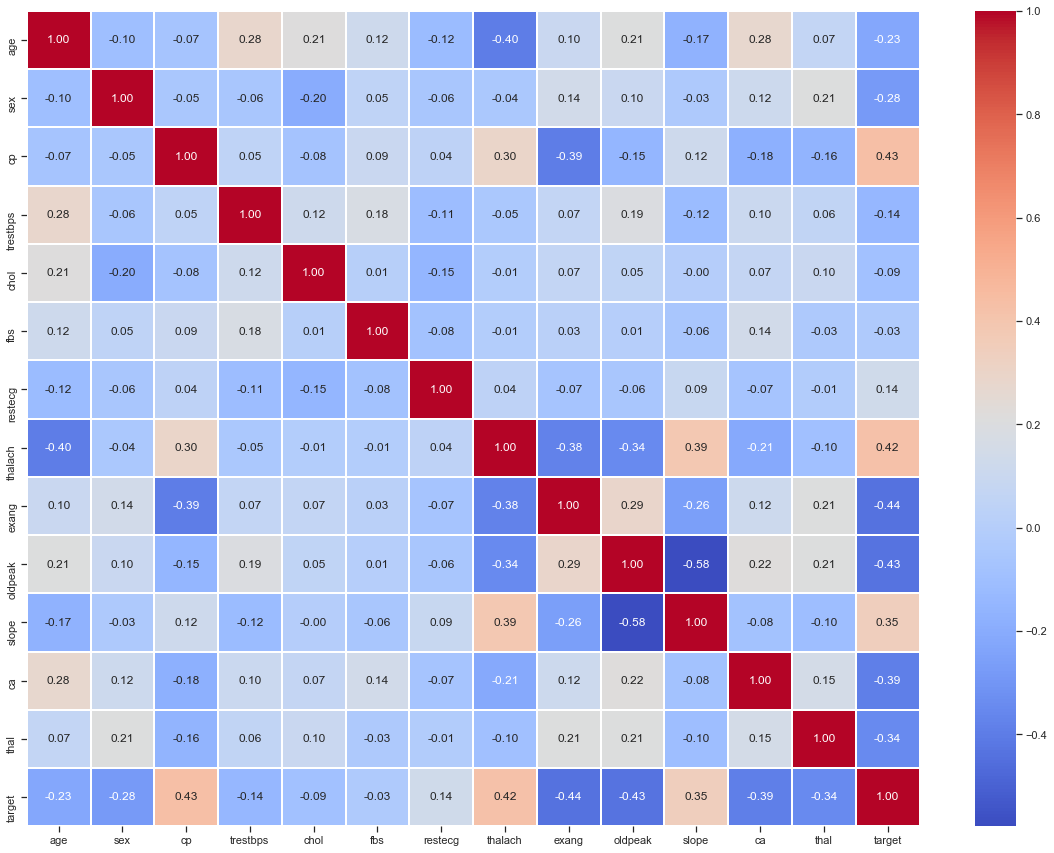

In [27]:
### Seaborn Heatmap
plt.figure()
fig, ax = plt.subplots(figsize=(20,15))

ax = sns.heatmap(df.corr(),
                annot=True,
                linewidths=1,
                fmt='.2f',
                cmap='coolwarm');

## 5.2. Modelling

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 5.2.1 Getting the Data ready

In [29]:
X = df.drop('target', axis=1)
y = df.target

In [30]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [32]:
# Split in Train and Test

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2)

In [33]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [34]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

### 5.2.2 Choosing the right model:

* **Training** the model on train set: **Finding the patterns**
* **Testing** the model on test set: **Using the patterns**

Trying Three Different Models:
1. Logistic Regression
2. K-Nearest Neighbours
3. Random Forest Classifier

In [35]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier(n_estimators=100)}

# Creating a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates machine learning models.
    models : a dict of different scikit-learn ML models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test: test labels
    """
    
    # setting random seed
    np.random.seed(42)
    
    # Make a model score empty dictionary
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        
        # Fit the model to data
        model.fit(X_train, y_train)
        
        # Evaluate the model amd append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [36]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

C:\Users\R558\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#### Model Comparison

In [37]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.868852,0.688525,0.836066


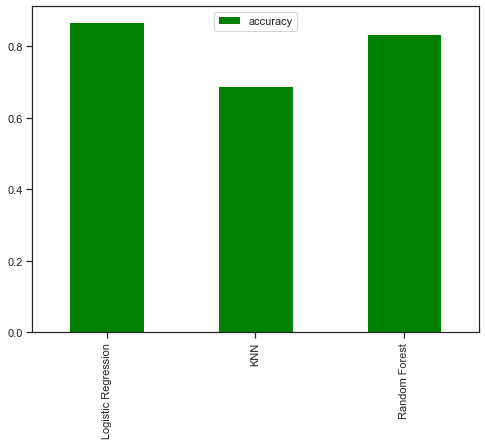

In [38]:
model_compare.T.plot(kind='bar', figsize=(8,6), color=['Green'])
plt.legend(loc='upper center')

### Improving our model:

* Hyperparameter Tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision 
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### 5.2.3. Hyperparameter Tuning:

* Tuning KNN

In [39]:
train_scores = []
test_scores = []

# Create a list of different values of n-neighbours
neighbors = range(1,21)

# Setup KNN instance
knn  = KNeighborsClassifier()

# Loop through different n-neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [40]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [41]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


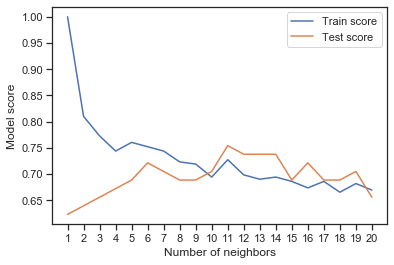

In [42]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

### Hyperparameter Tuning with RandomizedSearchCV:

Tuning
* LogisticRegression()
* RandomForestClassifier()

using RandomizedSearchCV

In [43]:
# Creat a hyperparameter grid for Logistic Regression
log_reg_grid = {'C': np.logspace(-4,4,20),
               'solver': ['liblinear']}

# Creat a hyperparameters grid for RandomForestlassifier

rf_grid = {'n_estimators': np.arange(10,1000,50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1,20,2)}

* Tuning Logistic Regression

In [44]:
np.random.seed(42)

# Setup randomized hyperparamter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit randomized hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
C:\Users\R558\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [45]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [46]:
logistic_randomsearch = rs_log_reg.score(X_test, y_test)
logistic_randomsearch

0.8852459016393442

In [47]:
model_scores

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

* Tuning RandomForestClassifier

In [48]:
# Setup RandomSeed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit randomized hyperparamter search for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.8min finished
C:\Users\R558\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [49]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [50]:
# Evaluate the randomized search RandomForestClassifier
randomforest_randomsearch = rs_rf.score(X_test, y_test)
randomforest_randomsearch

0.8688524590163934

In [51]:
model_scores

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Hyperparameter Tuning with GridSearchCV:

Tuning
* LogisticRegression()
* RandomForestClassifier()

using GridSearchCV

In [52]:
# Hyperparameters for LogisticRegression Model
log_reg_grid = {'C': np.logspace(-4,4,30),
               'solver':['liblinear']}

# GridSearchCv for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5, verbose=True)

# Fit Grid hyperparameter search model on Training Data
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished
C:\Users\R558\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.0000000...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.

In [53]:
# Check the best params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [54]:
# Evaluate the GridSearch LogisticRegressionModel
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [55]:
logistic_randomsearch

0.8852459016393442

In [56]:
model_scores

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}